In [12]:
# Load dataset
import pandas as pd

data = pd.read_csv("C:\\Users\\sonja tilly.ABERDEEN\\creditcardfraud\\creditcard.csv")

In [13]:
# Scale data in 'Amount' columns
from sklearn.preprocessing import StandardScaler

data['stdAmount'] = StandardScaler().fit_transform(data['Amount'].reshape(-1,1))

# Drop 'Amount'
data = data.drop(['Time', 'Amount'],axis=1)

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,stdAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [14]:
# Create X and y

y = data['Class']
X = data.drop(['Class'], axis=1)

In [15]:
# Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [40]:
# Try RandomForestClassifier
'''Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees (source: Wikipedia)'''

from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier()
clf1 = clf1.fit(X_train, y_train)

y_pred1 = clf1.predict(X_train)

# calculate cross validation score

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf1, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [53]:
# Compute Area Under the Curve (AUC) from prediction scores

from sklearn.metrics import roc_auc_score

AUC1 = roc_auc_score(y_train, y_pred1)
print("Roc AUC score: %0.2f " % (AUC1))

Roc AUC score: 0.97 


In [41]:
# calculate precision and recall scores

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

precision = precision_score(y_train, y_pred1, average='binary')
recall = recall_score(y_train, y_pred1, average='binary')

print("Precision score: %0.2f " % (precision))
print("Recall score: %0.2f " % (recall))

Precision score: 1.00 
Recall score: 0.94 


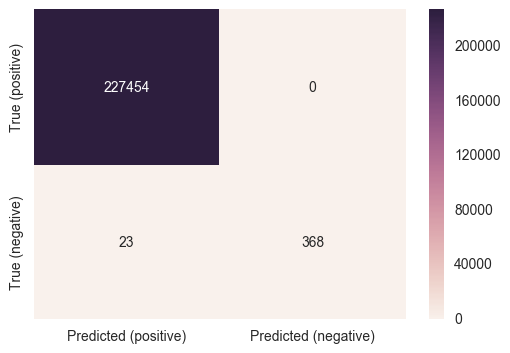

In [42]:
# generate confusion matrix

from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
%matplotlib inline


cm3 = confusion_matrix(y_train,y_pred1)

df_cm3 = pd.DataFrame(cm3, index = ['True (positive)', 'True (negative)'])
df_cm3.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm3, annot=True, fmt="d")

In [43]:
# Try Gaussian Naive Bayes Classifier
'''Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. It is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.(source: Wikipedia)'''
from sklearn.naive_bayes import GaussianNB 

clf2 = GaussianNB()
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_train)

# calculate cross validation score

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf2, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.00)


In [54]:
# Compute Area Under the Curve (AUC) from prediction scores

from sklearn.metrics import roc_auc_score

AUC2 = roc_auc_score(y_train, y_pred2)
print("Roc AUC score: %0.2f " % (AUC2))

Roc AUC score: 0.90 


In [44]:
# calculate precision and recall score

precision = precision_score(y_train, y_pred2, average='binary')
recall = recall_score(y_train, y_pred2, average='binary')

print("Precision score: %0.2f " % (precision))
print("Recall score: %0.2f " % (recall))

Precision score: 0.06 
Recall score: 0.82 


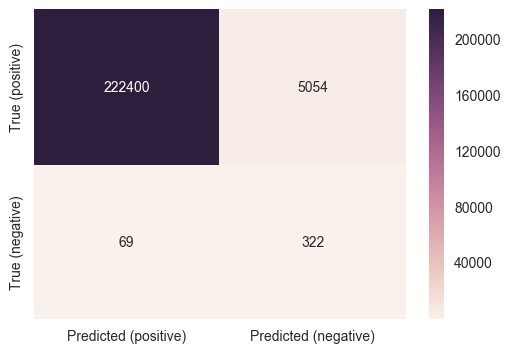

In [45]:
# generate confusion matrix

cm = confusion_matrix(y_train,y_pred2)

df_cm = pd.DataFrame(cm, index = ['True (positive)', 'True (negative)'])
df_cm.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm, annot=True, fmt="d")

In [46]:
# Try Logistic Regression Classifier
'''Logistic regression is a regression model where the dependent variable is categorical (source: Wikipedia)'''

from sklearn.linear_model import LogisticRegression

clf3 = LogisticRegression()
clf3.fit(X,y)
y_pred3 = clf3.predict(X_train)

# calculate cross validation score

from sklearn.cross_validation import cross_val_score

scores = cross_val_score(clf3, X_train, y_train, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 1.00 (+/- 0.00)


In [55]:
# Compute Area Under the Curve (AUC) from prediction scores

from sklearn.metrics import roc_auc_score

AUC3 = roc_auc_score(y_train, y_pred3)
print("Roc AUC score: %0.2f " % (AUC3))

Roc AUC score: 0.81 


In [47]:
# calculate precision and recall score

precision = precision_score(y_train, y_pred3, average='binary')
recall = recall_score(y_train, y_pred3, average='binary')

print("Precision score: %0.2f " % (precision))
print("Recall score: %0.2f " % (recall))

Precision score: 0.87 
Recall score: 0.61 


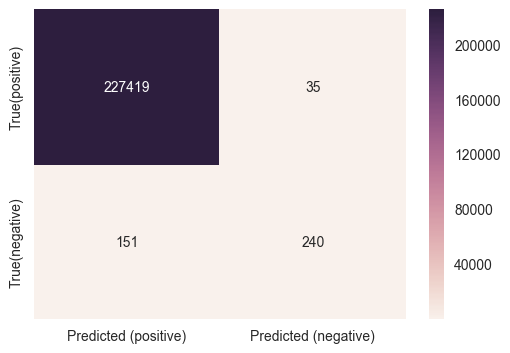

In [48]:
# generate confusion matrix

cm2 = confusion_matrix(y_train,y_pred3)

df_cm2 = pd.DataFrame(cm2, index = ['True(positive)', 'True(negative)'])
df_cm2.columns = ['Predicted (positive)', 'Predicted (negative)']

sns.heatmap(df_cm2, annot=True, fmt="d")